### <span style="color:orange;font-size:1.4em;"><b>MODEL BUILDING</b> </span> 

In [84]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


In [85]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

# Target Column(Cost)

In [86]:
y = df['cost']
y

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
23243    1200.0
23244    2000.0
23245    1200.0
23246     800.0
23247    2500.0
Name: cost, Length: 23248, dtype: float64

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)


# Applying Supervised Machine Learning Techniques

## **Random Forest**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
X=x.drop(["cost"],axis=1)
RF_Model=RandomForestRegressor(n_estimators=600,random_state=245)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
print("r2_score is:",r2_score(y_test,y_predict)*100)

In [88]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
X=x.drop(["cost"],axis=1)
RF_Model=RandomForestRegressor(n_estimators=600,random_state=245)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
print("r2_score is:",r2_score(y_test,y_predict)*100)

r2_score is: 99.9803380420018


The random forest model is overfitting

# PCA

# Covariance Matrix

In [90]:
from sklearn.preprocessing import StandardScaler
X = x

X_std = StandardScaler().fit_transform(X)

In [91]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00004302e+00 -1.35984242e-01 -7.90052220e-02 -9.79828560e-02
   5.03252792e-02 -1.95190804e-02 -2.94360829e-01 -3.43282612e-01]
 [-1.35984242e-01  1.00004302e+00  3.25978406e-01  1.09397706e-01
  -2.17498632e-01  6.82303344e-03  6.03671143e-01  8.57011827e-02]
 [-7.90052220e-02  3.25978406e-01  1.00004302e+00  4.61426410e-02
  -9.20517374e-02 -4.96576311e-02  3.11110001e-01  3.01189952e-02]
 [-9.79828560e-02  1.09397706e-01  4.61426410e-02  1.00004302e+00
  -7.70646008e-02 -4.30185152e-04  2.00390892e-01  1.88759577e-02]
 [ 5.03252792e-02 -2.17498632e-01 -9.20517374e-02 -7.70646008e-02
   1.00004302e+00  2.57386329e-01 -2.55975445e-01 -3.67069091e-02]
 [-1.95190804e-02  6.82303344e-03 -4.96576311e-02 -4.30185152e-04
   2.57386329e-01  1.00004302e+00 -4.79584508e-02  3.30003587e-02]
 [-2.94360829e-01  6.03671143e-01  3.11110001e-01  2.00390892e-01
  -2.55975445e-01 -4.79584508e-02  1.00004302e+00  1.29586241e-01]
 [-3.43282612e-01  8.57011827e-02  3.01189952e-

# Eigen Vectors

In [92]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [93]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 3.16177113e-01 -2.20570397e-01 -5.11152585e-01  3.03660651e-01
   4.84081297e-01 -4.98323863e-01  1.23417267e-01 -8.83658826e-04]
 [-5.16149656e-01  6.32802599e-01 -9.92492603e-02  2.97626936e-01
   3.67842917e-01  1.01249997e-01  2.76717126e-01  1.12186690e-01]
 [-3.55391437e-01 -5.96534028e-03 -1.48754965e-01  3.32397610e-01
  -3.13932527e-01 -3.34716771e-01 -6.51961457e-01  3.24657421e-01]
 [-2.08133678e-01  8.59402231e-02  2.20897713e-02  4.89611695e-02
   5.02890988e-02 -1.76560446e-01 -2.58912508e-01 -9.19603841e-01]
 [ 3.00294831e-01 -3.32508744e-02  4.06814501e-01  4.19868980e-01
   4.66253245e-01  3.86210458e-01 -4.46023042e-01  3.79767547e-02]
 [ 8.98049111e-02 -5.27797406e-02  4.84105739e-01  5.92484778e-01
  -3.55696618e-01 -2.93628415e-01  4.31922672e-01 -6.67673124e-02]
 [-5.66470338e-01 -7.32395025e-01 -2.40419817e-02  1.37849817e-01
   1.53929774e-01  2.64940032e-01  1.69361743e-01 -2.36071710e-02]
 [-2.11821419e-01 -5.65196250e-02  5.53011934e-01 -

In [94]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [95]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 27.18577016  43.32088527  57.25195853  69.4396841   79.26551441
  87.68051073  95.45329243 100.        ]


# Random Forest After applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [97]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)


In [98]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([5.38374086e-01, 3.36603056e-01, 6.48394281e-02, 5.99409030e-02,
       1.43147763e-04, 9.93006416e-05, 4.72135383e-08, 3.15834795e-08])

In [ ]:
RF_Model=RandomForestRegressor(n_estimators=600,random_state=245)
RF_Model.fit(X_train_2,y_train)

In [99]:
RF_Model=RandomForestRegressor(n_estimators=600,random_state=245)
RF_Model.fit(X_train_2,y_train)


RandomForestRegressor(n_estimators=600, random_state=245)

In [100]:
y_predict=RF_Model.predict(X_test)
r2=r2_score(y_predict,y_test)
r2=abs(r2)
print("The r2 score after applying PCA:",r2*100)

The r2 score after applying PCA: 97.97846014838285


We got a good model after feature reduction with PCA

# KMEANS CLUSTERING BASED COST

In [ ]:
X_filtered = x[['rest_type', 'cost']]
X_filtered.head()

In [101]:
X_filtered = x[['rest_type', 'cost']]
X_filtered.head()

,rest_type,cost
0,20,800.0
1,20,800.0
2,16,800.0
3,62,300.0
4,20,600.0


In [102]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler()
num_norm = X_norm.fit_transform(X_filtered)
X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,rest_type,cost
0,-0.630710,0.089342
1,-0.630710,0.089342
2,-0.825770,0.089342
3,1.417419,-0.871345
4,-0.630710,-0.294933


In [104]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

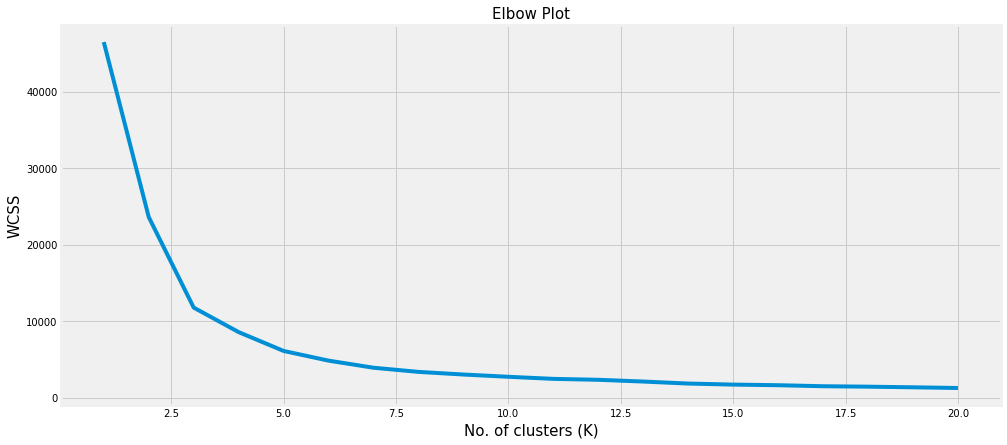

In [105]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

plt.show()

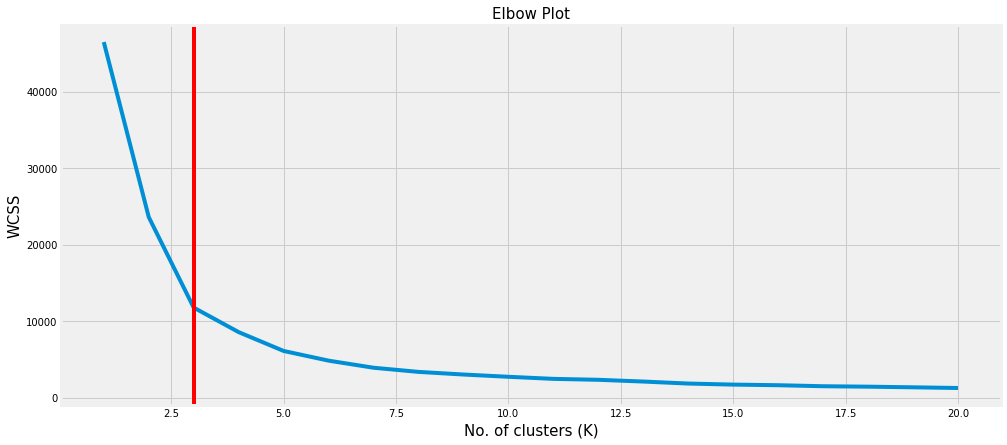

In [106]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

plt.axvline(x = 3, color = 'red')
plt.show()

The optimal number of clusters are 3 from the above plot

# Grouping based on optimal number of clusters( KMEANS )

In [107]:
# build a K-Means model with 3 clusters
new_clusters = KMeans(n_clusters = 3, random_state = 10)
new_clusters.fit(X)
X['Cluster'] = new_clusters.labels_
X.head()

,rest_type,cost,Cluster
0,-0.630710,0.089342,0
1,-0.630710,0.089342,0
2,-0.825770,0.089342,0
3,1.417419,-0.871345,1
4,-0.630710,-0.294933,0


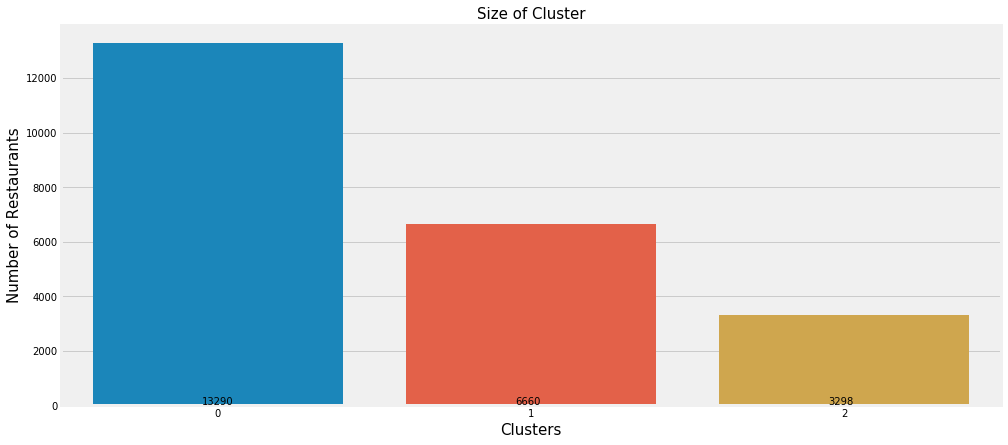

In [108]:
sns.countplot(data= X, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Restaurants', fontsize = 15)

plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])


# display the plot
plt.show()

<b>Most restaurants are grouped under Cluster 0 followed by cluster 1</b>

### Analyzing Cluster 0

In [109]:
len(X[X['Cluster'] == 0])

13290

In [110]:
Z=x[["rest_type","cost"]]
# Z["votes"]=X["votes"]
Z["Cluster"]=X["Cluster"]

In [111]:
Z[Z.Cluster==0].describe()

,rest_type,cost,Cluster
count,13290.000000,13290.000000,13290.0
mean,19.099774,680.832205,0.0
std,6.737378,253.399343,0.0
min,0.000000,100.000000,0.0
25%,13.000000,500.000000,0.0
50%,20.000000,650.000000,0.0
75%,20.000000,800.000000,0.0
max,41.000000,1300.000000,0.0


<b>The average cost is 680 and the average votes for the restaurants that belong to cluster 0 are 555.94</b>

# Heirarchial Clustering (Agglomerative Clustering)

### Linkage matrix method=Ward

In [112]:
features = x

In [113]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [114]:

link_mat = linkage(features_scaled, method = 'ward')     
print(link_mat[0:10])

[[  0. 210.   0.   2.]
 [  1. 148.   0.   2.]
 [  2.  13.   0.   2.]
 [  3. 304.   0.   2.]
 [  4. 328.   0.   2.]
 [  5. 124.   0.   2.]
 [  6.  32.   0.   2.]
 [  7. 153.   0.   2.]
 [  8. 105.   0.   2.]
 [  9.  89.   0.   2.]]


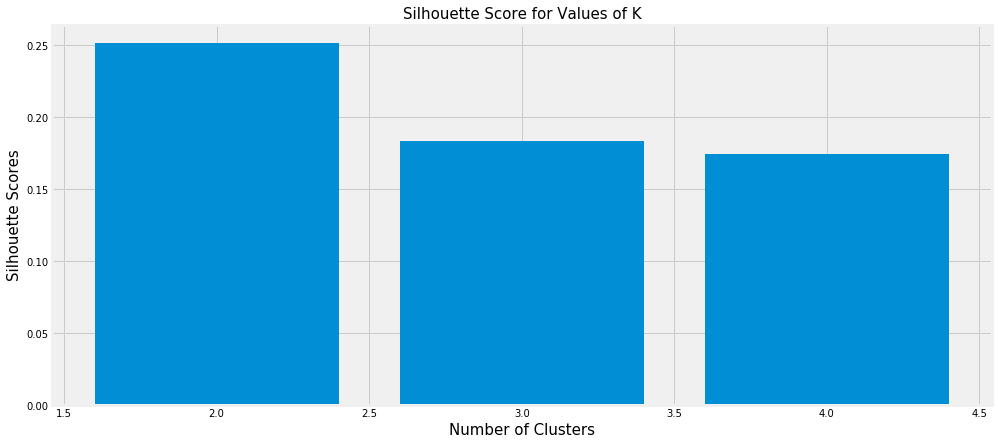

In [115]:
K = [2,3,4]


silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
 
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

<b>From the above plot we can see that optimal number of clusters is 2</b>

## Considering number of clusters as 2 and applying ward linkage

In [116]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters.fit(features_scaled)

AgglomerativeClustering()

In [117]:
x['Cluster'] = clusters.labels_
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,Cluster
0,1,1,775,1,20,1386,800.0,5047,1
1,1,0,787,1,20,594,800.0,5047,0
2,1,0,918,1,16,484,800.0,5047,0
3,0,0,88,1,62,1587,300.0,5047,0
4,0,0,166,4,20,1406,600.0,5047,0


In [118]:
x[x.Cluster == 0].head(10)

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,Cluster
1,1,0,787,1,20,594,800.0,5047,0
2,1,0,918,1,16,484,800.0,5047,0
3,0,0,88,1,62,1587,300.0,5047,0
4,0,0,166,4,20,1406,600.0,5047,0
5,1,0,286,4,20,1156,600.0,5047,0
7,1,0,324,1,13,462,700.0,5047,0
8,1,0,504,1,13,485,550.0,5047,0
9,1,0,402,1,13,332,500.0,5047,0
12,0,0,424,1,13,383,450.0,5047,0
13,1,0,918,1,16,484,800.0,5047,0


In [119]:
x[x.Cluster==0].describe()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,Cluster
count,16607.000000,16607.0,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.0
mean,0.748600,0.0,285.819775,33.915096,35.855242,864.227856,543.962787,4229.465888,0.0
std,0.433831,0.0,341.799694,23.801621,21.589527,482.380218,292.483593,1449.203860,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.0
25%,0.000000,0.0,84.000000,15.000000,20.000000,407.000000,350.000000,3928.500000,0.0
50%,1.000000,0.0,163.000000,30.000000,29.000000,878.000000,500.000000,5047.000000,0.0
75%,1.000000,0.0,339.000000,48.000000,62.000000,1214.500000,650.000000,5047.000000,0.0
max,1.000000,0.0,4460.000000,87.000000,72.000000,1680.000000,2200.000000,5047.000000,0.0


<b>The average votes is 285 and the average cost of the food is 864 </b>

# Density Based Clustering (DBSCAN)

In [120]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.8, min_samples = 15)
model.fit(features_scaled)

DBSCAN(eps=0.8, min_samples=15)

In [121]:
np.array(set(model.labels_))

array({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, -1},
      dtype=object)

We can infer that the cluster -1 is the where the data points are outliers

In [122]:
x['Cluster_DBSCAN'] = model.labels_

x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,Cluster,Cluster_DBSCAN
0,1,1,775,1,20,1386,800.0,5047,1,0
1,1,0,787,1,20,594,800.0,5047,0,1
2,1,0,918,1,16,484,800.0,5047,0,1
3,0,0,88,1,62,1587,300.0,5047,0,2
4,0,0,166,4,20,1406,600.0,5047,0,2


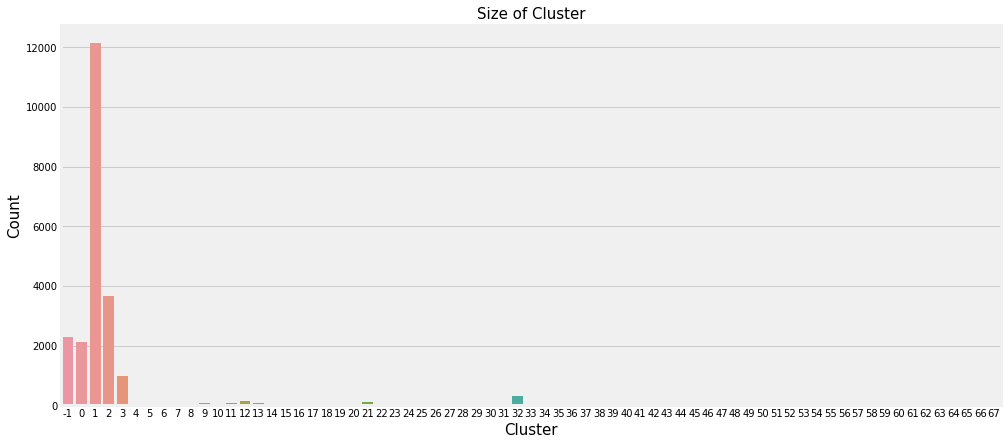

In [123]:
sns.countplot(data = x, x = 'Cluster_DBSCAN')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

The maximum data points belong to cluster 1 and there are more than 2000 outliers present which is seen from the above plot

In [124]:
x[x.Cluster_DBSCAN==-1].index.value_counts()

2049     1
8197     1
13633    1
4743     1
8843     1
        ..
9500     1
19741    1
9502     1
19743    1
18431    1
Length: 2305, dtype: int64

In [125]:
x[x.Cluster_DBSCAN==-1].index.value_counts().sum()

2305

There are 2305 outliers identified by DBSCAN

# Content Based Recommendation

In [126]:
x1=df.iloc[:,[1,2,3,4,5,6,7,9,10,12]]
x1.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,Jalsa,1,1,4.1,775,1,20,1386,800.0,5047
1,Spice Elephant,1,0,4.1,787,1,20,594,800.0,5047


In [127]:
x1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'menu_item'],
      dtype='object')

In [128]:
x1.drop_duplicates(inplace=True)
x1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23206    False
23207    False
23211    False
23218    False
23226    False
Length: 13799, dtype: bool

In [129]:
x1[x1.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item


In [130]:
x1=x1.set_index("name")

In [131]:
x1.head(5)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
name,,,,,,,,,
Jalsa,1,1,4.1,775,1,20,1386,800.0,5047
Spice Elephant,1,0,4.1,787,1,20,594,800.0,5047
San Churro Cafe,1,0,3.8,918,1,16,484,800.0,5047
Addhuri Udupi Bhojana,0,0,3.7,88,1,62,1587,300.0,5047
Grand Village,0,0,3.8,166,4,20,1406,600.0,5047


In [132]:
from sklearn.neighbors import NearestNeighbors

In [133]:
rec_model = NearestNeighbors(metric = 'cosine')
rec_model.fit(x1)

NearestNeighbors(metric='cosine')

In [134]:
query_rest_index=850
dist, ind = rec_model.kneighbors(x1.iloc[query_rest_index, :].values.reshape(1, -1), n_neighbors = 6)


In [135]:
top5=list(x1.index[ind[0]])[1:]
top5

['Desi Bites',
 'Ujwal Restaurant',
 'Manasa Fishland',
 'Subway',
 'Coastal Delight']

In [136]:

cuisine = x1['cuisines'].loc[top5].unique()
rating = x1['rate'].loc[top5].unique()
cos=x1["cost"].loc[top5].unique()
loc=x1["location"].loc[top5]

In [137]:
name=[]

type1=[]

rat=[]

cost=[]
loc1=[]
    
for i in range(0, len(dist[0])):
    if i == 0:
        print('Top 5 Recommendations for the user who ate at the restaurant :',x1.index[query_rest_index])
        
    else:
       
        name.append(x1.index[ind[0][i]])
        type1.append(df.type[i])
        rat.append(rating[i])
        cost.append(cos[i])
        loc1.append(loc[i])
        
da=[[name[0],rat[0],cost[0],loc1[0]],[name[1],rat[1],cost[1],loc1[1]],
    [name[2],rat[2],cost[2],loc1[2]],[name[3],rat[3],cost[3],loc1[3]],[name[4],rat[4],cost[4],loc1[4]]]
dt=pd.DataFrame(da,columns=["NAME","RATINGS","COST","LOCATION"])       
dt
        

Top 5 Recommendations for the user who ate at the restaurant : Anupam's Coastal Express


,NAME,RATINGS,COST,LOCATION
0,Desi Bites,3.7,600.0,53
1,Ujwal Restaurant,4.1,550.0,55
2,Manasa Fishland,3.2,700.0,53
3,Subway,3.8,650.0,53
4,Coastal Delight,2.7,500.0,81
